### Import libraries

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import Normalize

### Import data and set up axes

In [61]:
# Setting up axes
N = 100

n_om = N
n_s8 = N
n_gamma = N

om_min = .05
om_max = 1

s8_min = 0.4
s8_max = 1.2

gamma_min = -0.5
gamma_max = 2

omega_vals = np.asarray(np.linspace(om_min, om_max, n_om))
sigma_vals = np.asarray(np.linspace(s8_min, s8_max, n_s8))
gamma_vals = np.asarray(np.linspace(gamma_min, gamma_max, n_gamma))

# Importing data
## 1
data_rsd = np.load("../../output/1-chi2_RSD/lowres/chi2_grids.npz")
chi2_grid1_rsd = data_rsd['grid1']
chi2_grid2_rsd = data_rsd['grid2']
chi2_grid3_rsd = data_rsd['grid3']
## 2

chi2_grid1_rsd_desidr2 = np.load("../../output/2-chi2_RSD_DESIDR2/lowres/chi2_grid1.npz")['grid1']
chi2_grid2_rsd_desidr2 = np.load("../../output/2-chi2_RSD_DESIDR2/lowres/chi2_grid2.npz")['grid2']
chi2_grid3_rsd_desidr2 = np.load("../../output/2-chi2_RSD_DESIDR2/lowres/chi2_grid3.npz")['grid3']

chi2_grid1_rsd_panth = np.load("../../output/2-chi2_RSD_PANTH/lowres/chi2_grid1.npz")['grid1']
chi2_grid2_rsd_panth = np.load("../../output/2-chi2_RSD_PANTH/lowres/chi2_grid2.npz")['grid2']
chi2_grid3_rsd_panth = np.load("../../output/2-chi2_RSD_PANTH/lowres/chi2_grid3.npz")['grid3']

## 3
chi2_grid1_rsd_panth_actdr6 = np.load("../../output/3-chi2_RSD_PANTH_ACTDR6/lowres/chi2_grid1.npz")['grid1']
chi2_grid2_rsd_panth_actdr6 = np.load("../../output/3-chi2_RSD_PANTH_ACTDR6/lowres/chi2_grid2.npz")['grid2']
chi2_grid3_rsd_panth_actdr6 = np.load("../../output/3-chi2_RSD_PANTH_ACTDR6/lowres/chi2_grid3.npz")['grid3']

chi2_grid1_rsd_panth_desidr2 = np.load("../../output/3-chi2_RSD_PANTH_DESIDR2/lowres/chi2_grid1.npz")['grid1']
chi2_grid2_rsd_panth_desidr2 = np.load("../../output/3-chi2_RSD_PANTH_DESIDR2/lowres/chi2_grid2.npz")['grid2']
chi2_grid3_rsd_panth_desidr2 = np.load("../../output/3-chi2_RSD_PANTH_DESIDR2/lowres/chi2_grid3.npz")['grid3']

chi2_rsd = [chi2_grid1_rsd, chi2_grid2_rsd, chi2_grid3_rsd]

chi2_rsd_panth = [chi2_grid1_rsd_panth, chi2_grid2_rsd_panth, chi2_grid3_rsd_panth]
chi2_rsd_desidr2 = [chi2_grid1_rsd_desidr2, chi2_grid2_rsd_desidr2, chi2_grid3_rsd_desidr2]

chi2_rsd_panth_actdr6 = [chi2_grid1_rsd_panth_actdr6, chi2_grid2_rsd_panth_actdr6, chi2_grid3_rsd_panth_actdr6]
chi2_rsd_panth_desidr2 = [chi2_grid1_rsd_panth_desidr2, chi2_grid2_rsd_panth_desidr2, chi2_grid3_rsd_panth_desidr2]

methods = ['RSD', 'RSD + DESI_DR2', 'RSD + Pantheon+', 'RSD + Pantheon+ + DESI_DR2', 'RSD + Pantheon+ + ACT_DR6']
chi2_grids_methods = [chi2_rsd, chi2_rsd_desidr2, chi2_rsd_panth, chi2_rsd_panth_desidr2, chi2_rsd_panth_actdr6]

### Plot

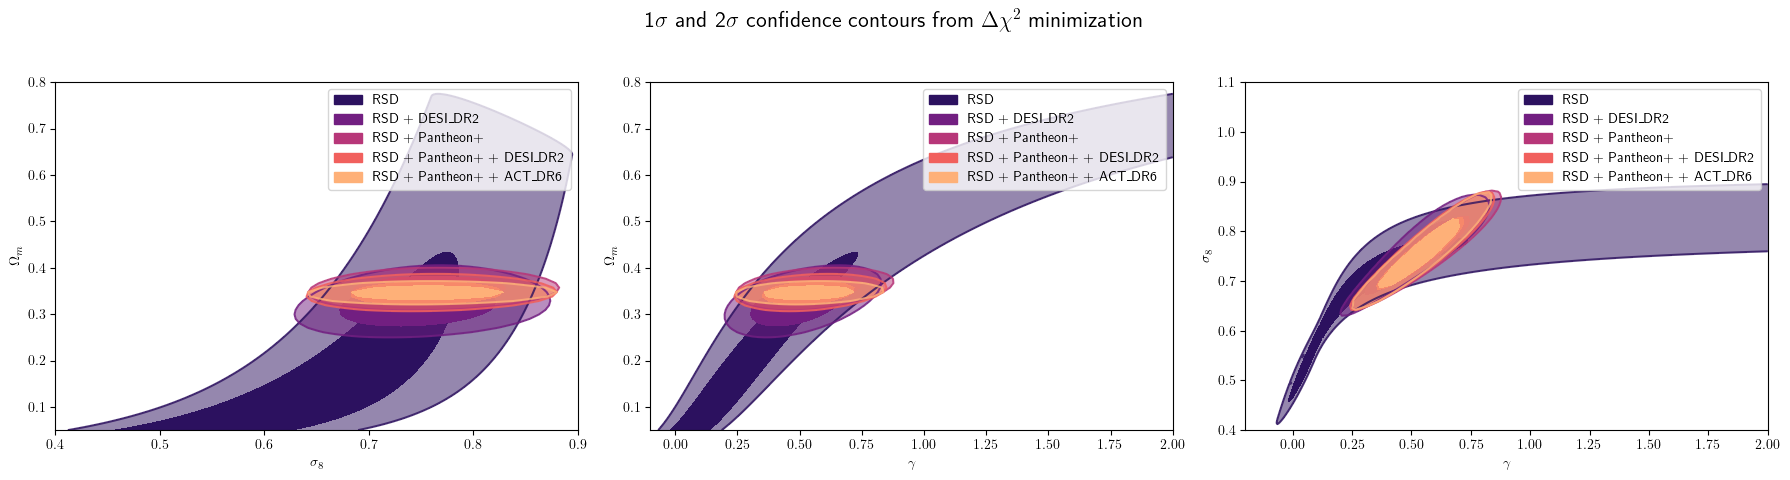

In [68]:
def display_all_chi2(chi2_grids_methods, axes, methods):
    levels = [[0, 2.3], [2.3, 6.17], [6.17, 11.8]]
    alphas = [1.0, 0.5, 0]

    axes_titles = [
        (r'$\sigma_8$', r'$\Omega_m$', 0),
        (r'$\gamma$', r'$\Omega_m$', 1),
        (r'$\gamma$', r'$\sigma_8$', 2)
    ]

    # colors_methods = ['silver', 'orange', 'royalblue', 'tomato', 'seagreen']

    color_shift = 1
    norm = Normalize(vmin=0, vmax=len(chi2_grids_methods)+color_shift)
    cmap = plt.get_cmap('magma')

    patchs = [Patch(color=cmap(norm(i+color_shift)), label=methods[i]) for i in range(len(methods))]

    for i_method in range(len(chi2_grids_methods)):
        chi2_grids = chi2_grids_methods[i_method]
        # color = colors_methods[i_method]
        color = cmap(norm(i_method+color_shift))
        colors = 3 * [color]

        for ax, (xlabel, ylabel, axis) in zip(axes, axes_titles):
            chi2_grid = chi2_grids[axis]

            sigma_vals = np.asarray(np.linspace(s8_min, s8_max, chi2_grid.shape[0]))
            omega_vals = np.asarray(np.linspace(om_min, om_max, chi2_grid.shape[0]))
            gamma_vals = np.asarray(np.linspace(gamma_min, gamma_max, chi2_grid.shape[0]))

            if axis == 0:
                X, Y = np.meshgrid(sigma_vals, omega_vals)
            elif axis == 1:
                X, Y = np.meshgrid(gamma_vals, omega_vals)
            elif axis == 2:
                X, Y = np.meshgrid(gamma_vals, sigma_vals)

            chi2_min = np.min(chi2_grid)
            delta_chi2 = chi2_grid - chi2_min

            delta_chi2_clipped = np.clip(delta_chi2, a_min=None, a_max=11.8)
            
            for level_bornes, color, alpha in zip(levels, colors, alphas):
                cs = ax.contourf(X, Y, delta_chi2, levels=[level_bornes[0], level_bornes[1]], colors=[color], alpha=alpha)
                if alpha == 0.5:
                    cs = ax.contour(X, Y, delta_chi2, levels=[level_bornes[1]], colors=[color], alpha=0.8)
                
            ax.set_xlabel(axes_titles[axis][0])
            ax.set_ylabel(axes_titles[axis][1])

            if axis == 0:
                ax.set_xlim([0.4, 0.9])
                ax.set_ylim([0.05, 0.8])
            elif axis == 1:
                ax.set_xlim([-0.1, 2])
                ax.set_ylim([0.05, 0.8])
            elif axis == 2:
                ax.set_xlim([-.2, 2])
                ax.set_ylim([0.4, 1.1])

            ax.legend(handles=patchs, loc='upper right')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(r"1$\sigma$ and 2$\sigma$ confidence contours from $\Delta \chi^2$ minimization", fontsize=16)
display_all_chi2(chi2_grids_methods, axes, methods)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.rcParams.update({
    "text.usetex": True
})
plt.show()

### Zoom in

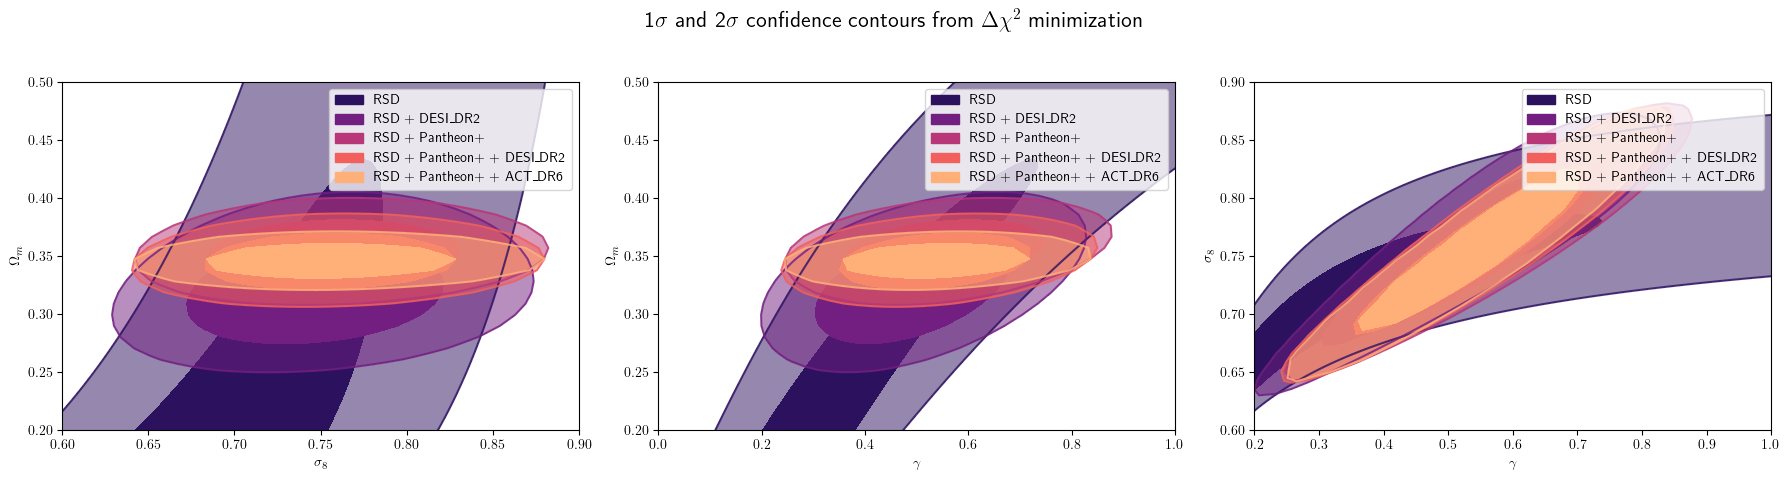

In [70]:
def display_all_chi2(chi2_grids_methods, axes, methods):
    levels = [[0, 2.3], [2.3, 6.17], [6.17, 11.8]]
    alphas = [1.0, 0.5, 0]

    axes_titles = [
        (r'$\sigma_8$', r'$\Omega_m$', 0),
        (r'$\gamma$', r'$\Omega_m$', 1),
        (r'$\gamma$', r'$\sigma_8$', 2)
    ]

    # colors_methods = ['silver', 'orange', 'royalblue', 'tomato', 'seagreen']

    color_shift = 1
    norm = Normalize(vmin=0, vmax=len(chi2_grids_methods)+color_shift)
    cmap = plt.get_cmap('magma')

    patchs = [Patch(color=cmap(norm(i+color_shift)), label=methods[i]) for i in range(len(methods))]

    for i_method in range(len(chi2_grids_methods)):
        chi2_grids = chi2_grids_methods[i_method]
        # color = colors_methods[i_method]
        color = cmap(norm(i_method+color_shift))
        colors = 3 * [color]

        for ax, (xlabel, ylabel, axis) in zip(axes, axes_titles):
            chi2_grid = chi2_grids[axis]

            sigma_vals = np.asarray(np.linspace(s8_min, s8_max, chi2_grid.shape[0]))
            omega_vals = np.asarray(np.linspace(om_min, om_max, chi2_grid.shape[0]))
            gamma_vals = np.asarray(np.linspace(gamma_min, gamma_max, chi2_grid.shape[0]))

            if axis == 0:
                X, Y = np.meshgrid(sigma_vals, omega_vals)
            elif axis == 1:
                X, Y = np.meshgrid(gamma_vals, omega_vals)
            elif axis == 2:
                X, Y = np.meshgrid(gamma_vals, sigma_vals)

            chi2_min = np.min(chi2_grid)
            delta_chi2 = chi2_grid - chi2_min

            delta_chi2_clipped = np.clip(delta_chi2, a_min=None, a_max=11.8)
            
            for level_bornes, color, alpha in zip(levels, colors, alphas):
                cs = ax.contourf(X, Y, delta_chi2, levels=[level_bornes[0], level_bornes[1]], colors=[color], alpha=alpha)
                if alpha == 0.5:
                    cs = ax.contour(X, Y, delta_chi2, levels=[level_bornes[1]], colors=[color], alpha=0.8)
                
            ax.set_xlabel(axes_titles[axis][0])
            ax.set_ylabel(axes_titles[axis][1])

            if axis == 0:
                ax.set_xlim([0.6, 0.9])
                ax.set_ylim([0.2, 0.5])
            elif axis == 1:
                ax.set_xlim([0, 1])
                ax.set_ylim([0.2, 0.5])
            elif axis == 2:
                ax.set_xlim([0.2, 1])
                ax.set_ylim([0.6, 0.9])

            ax.legend(handles=patchs, loc='upper right')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(r"1$\sigma$ and 2$\sigma$ confidence contours from $\Delta \chi^2$ minimization", fontsize=16)
display_all_chi2(chi2_grids_methods, axes, methods)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.rcParams.update({
    "text.usetex": True
})
plt.show()